# Building Various Machine Learning Models on the Adult-Income data set

I sourced the data from https://archive.ics.uci.edu/ml/machine-learning-databases/adult/. The data is split into train and test sets at the source site so I loaded them separately. Check out the link for more data backgroud. 

The goal is to use available data that determine whether an adult makes an income of <=50K or >50K to predict whether some other adult is going to make an income of <=50K or >50K given other instances of unlabeled data with the same set of features.

Also, as admitted on the given site and upon inspection, the missing values are represented in '?' form. So when reading the data sets using pandas, I used the 'na_values' parameter to catch them and make them null for missing values imputation purposes. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [61]:
#Loading the train data

column_names = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]
adult_data = pd.read_csv( "adult.txt",engine='python',sep =',\s',header = None, names =column_names,na_values = ['?'],index_col=False)
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [62]:
#Loading the test data

column_names = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]
adulttest_data = pd.read_csv( "adult-test.txt",engine='python',sep =',\s',header = None, names =column_names,na_values = ['?'],index_col=False)
adulttest_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [4]:
#Checking that '?' missing values were converted to nulls
adult_data.isnull().values.any()

True

In [5]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Data  info tells us we have 6 numeric variables and 9 categorical ones and a total of  32561 rows/observations.

## Handling Missing Values

First, find out which columns have missing values for both sets of data

In [6]:
missing_values_adult = adult_data.isnull().sum()
missing_values_adult


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [7]:
missing_values_adulttest = adulttest_data.isnull().sum()
missing_values_adulttest

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

From above, I see that there are missing values in workclass,occupation, and native-country columns. Since they are all categorical, I will impute them with the mode of their respective columns as follows

In [63]:
#Imputing missing values for train data and confirming that they are imputed

adult_data['workclass'].fillna(adult_data['workclass'].mode()[0],inplace = True)
adult_data['native-country'].fillna(adult_data['native-country'].mode()[0],inplace = True)
adult_data['occupation'].fillna(adult_data['occupation'].mode()[0],inplace = True)
adult_data.isnull().values.any()

False

Running the 'isnull' function again to confirm that the fillna above worked 


In [64]:
#Imputing missing values for test data and confirming that they are imputed

adulttest_data['workclass'].fillna(adulttest_data['workclass'].mode()[0],inplace = True)
adulttest_data['native-country'].fillna(adulttest_data['native-country'].mode()[0],inplace = True)
adulttest_data['occupation'].fillna(adulttest_data['occupation'].mode()[0],inplace = True)
adult_data.isnull().values.any()

False

## Checking for duplicates

In [65]:
duplicate_adult = adult_data[adult_data.duplicated()]
duplicate_adult.count()

age               24
workclass         24
fnlwgt            24
education         24
education-num     24
marital-status    24
occupation        24
relationship      24
race              24
sex               24
capital-gain      24
capital-loss      24
hours-per-week    24
native-country    24
income            24
dtype: int64

In [66]:
duplicate_adulttest = adulttest_data[adulttest_data.duplicated()]
duplicate_adulttest.count()

age               5
workclass         5
fnlwgt            5
education         5
education-num     5
marital-status    5
occupation        5
relationship      5
race              5
sex               5
capital-gain      5
capital-loss      5
hours-per-week    5
native-country    5
income            5
dtype: int64

There are some duplicates in both data sets, so I am going to drop those

In [67]:
adult_data.drop_duplicates()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [68]:
adulttest_data.drop_duplicates()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


## Visualizations and Exploratory Analysis

First, making the dependent variable a binary class variable as it is the basis for the models

In [69]:
adult_data['income_above_50K'] = adult_data['income'].map({'<=50K':0, '>50K':1})
adult_data = adult_data.drop(columns = ['income'])
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_above_50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [70]:
#do the same for test data
adulttest_data['income_above_50K'] = adulttest_data['income'].map({'<=50K.':0, '>50K.':1})
adulttest_data = adulttest_data.drop(columns = ['income'])
adulttest_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_above_50K
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


### Plotting countplots for categorical variables and histograms for numeric variables

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
categorical = [c for c in adult_data.columns if adult_data[c].dtype == 'object']
categorical


['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

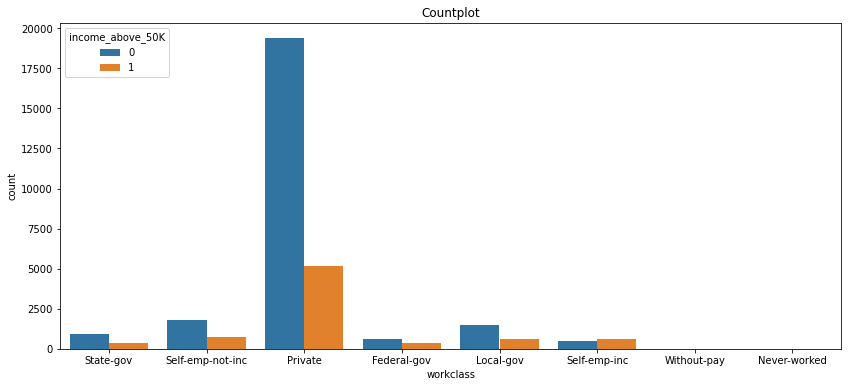

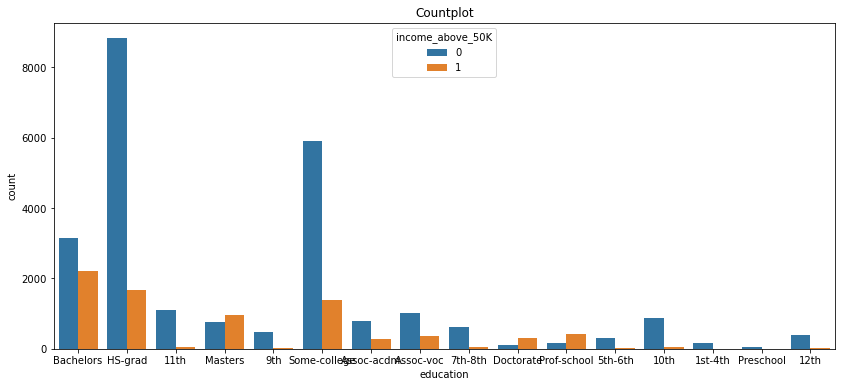

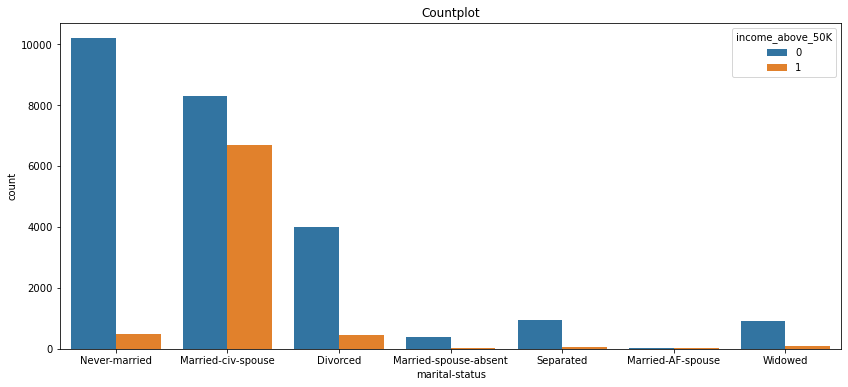

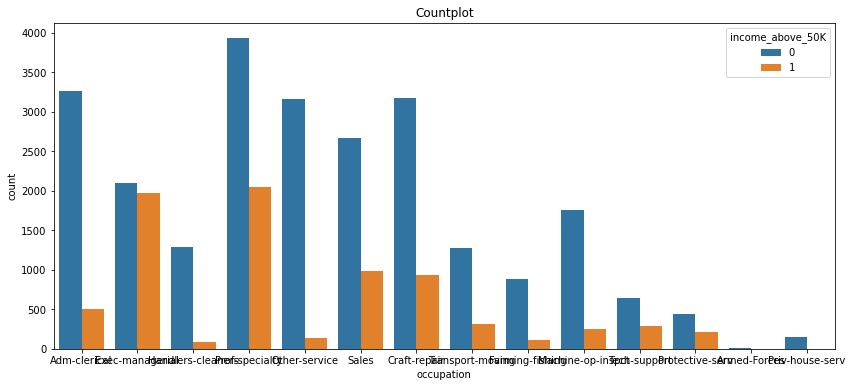

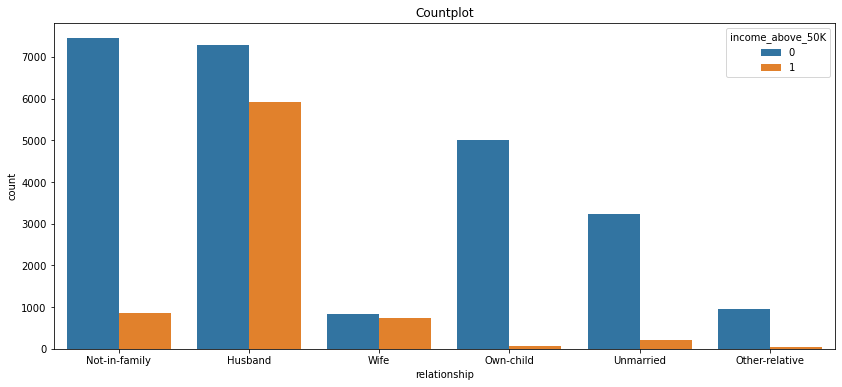

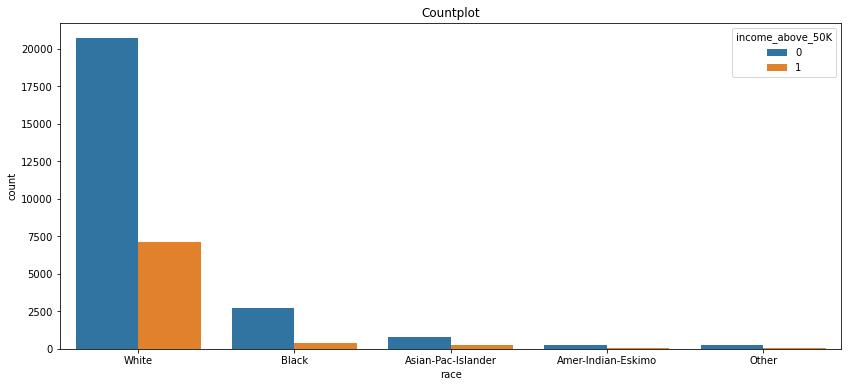

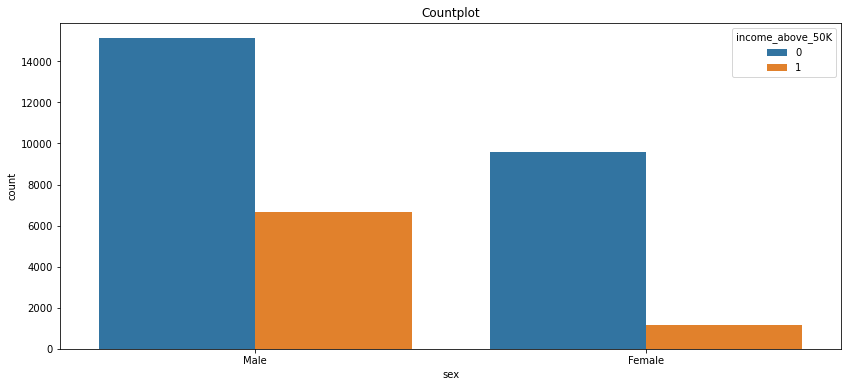

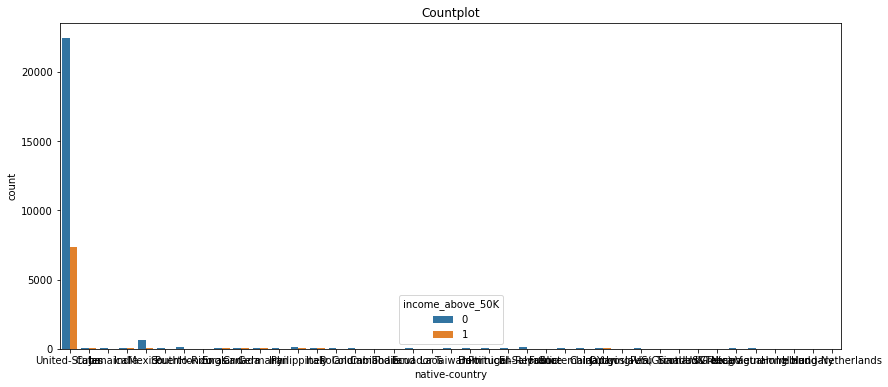

In [18]:
for i in categorical:
    f,axes = plt.subplots(figsize=(14,6))
    sns.countplot(x = i,hue = 'income_above_50K', data = adult_data )
    plt.title ("Countplot")
    plt.ylabel('count')
    plt.xlabel(i)
    plt.show()
    

After assessing the countplots above, it looks like I am better off OneHotEncoding native-country column.

In [71]:
adult_data['native-country'] = adult_data['native-country'].map({'United-States':1})
adult_data['native-country'].fillna(0, inplace=True)
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_above_50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,1.0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,1.0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,1.0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,1.0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,0.0,0


In [72]:
#doing the same for the test data

adulttest_data['native-country'] = adulttest_data['native-country'].map({'United-States':1})
adulttest_data['native-country'].fillna(0, inplace=True)
adulttest_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_above_50K
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,1.0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,1.0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1.0,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1.0,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,1.0,0


In [21]:
numerical = [n for n in adult_data.columns if adult_data[n].dtype == 'int64']
numerical


['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income_above_50K']

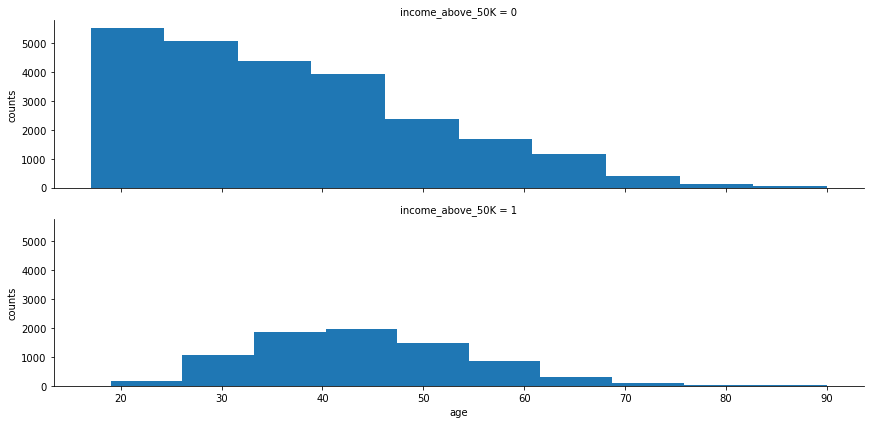

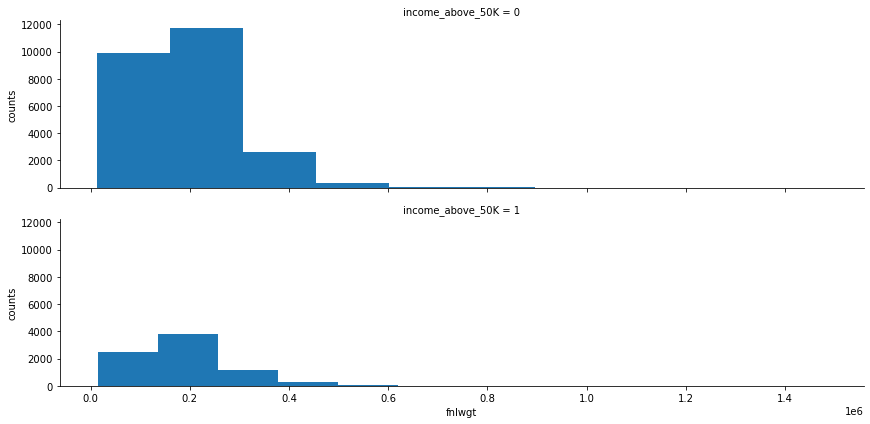

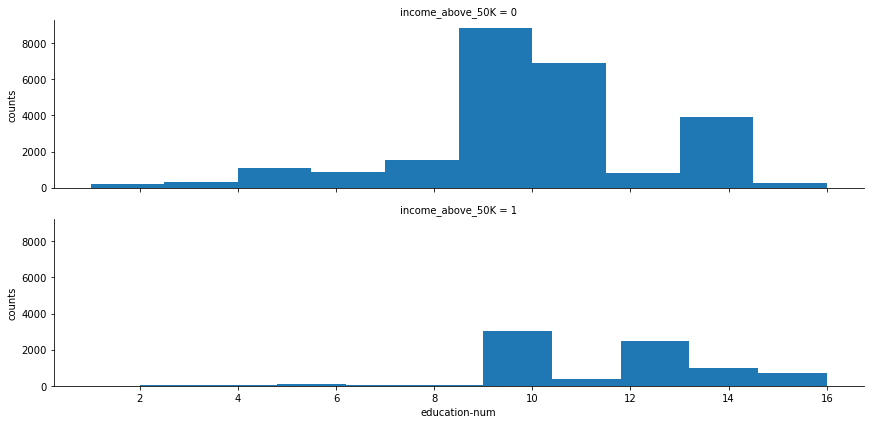

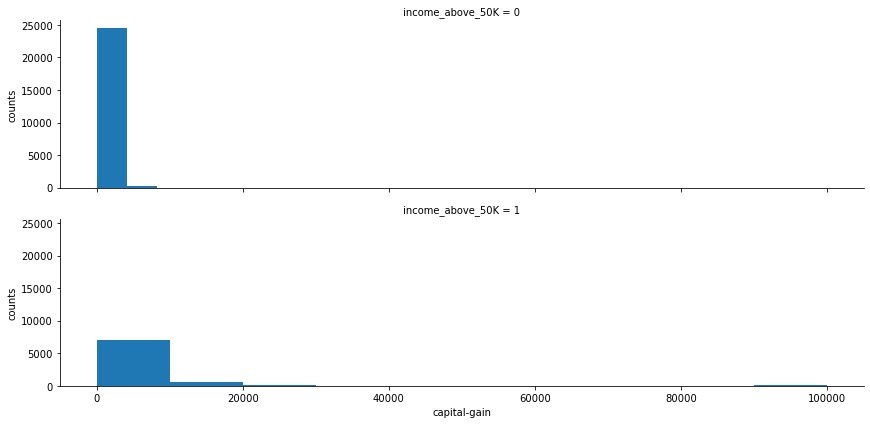

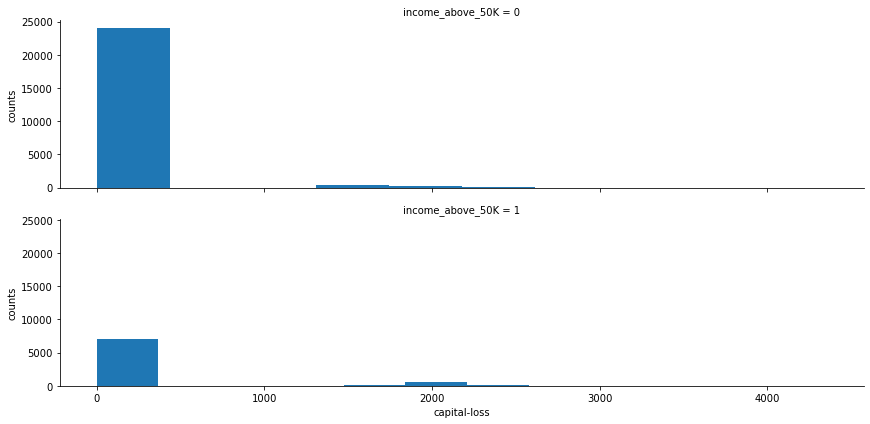

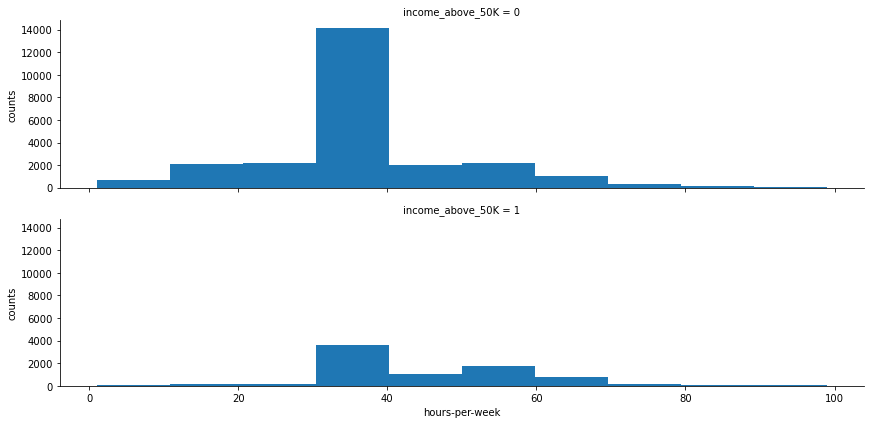

In [22]:
for i in numerical:
    if i == 'income_above_50K':
        continue
    g = sns.FacetGrid(adult_data, row = "income_above_50K", aspect = 4, height = 3)
    g = g.map(plt.hist,i)
    g.set_xlabels(i)
    g.set_ylabels("counts")
    plt.show
    

From the visualizations above, the data is either right-skewed or left-skewed for all variables except for 'hours-per-week' which appears to follow a normal distribution. Will keep this in mind when scaling/standardizing.

In [23]:
adult_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,native-country,income_above_50K
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.913762,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.280720,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,1.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,1.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,1.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000


## Outlier detection and handling 

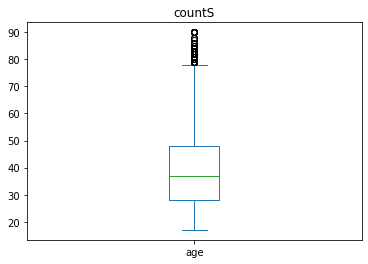

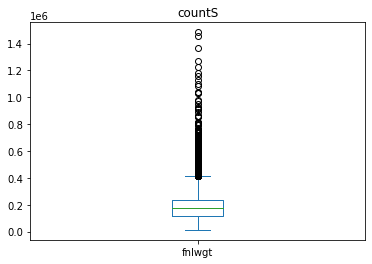

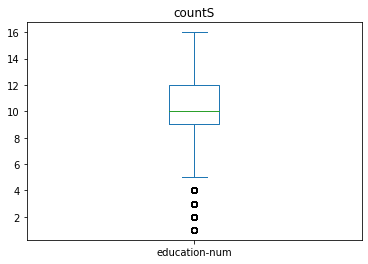

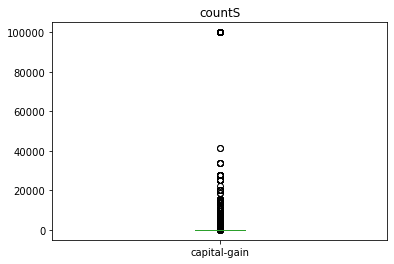

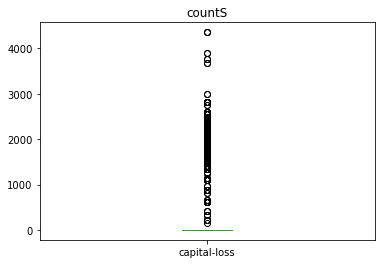

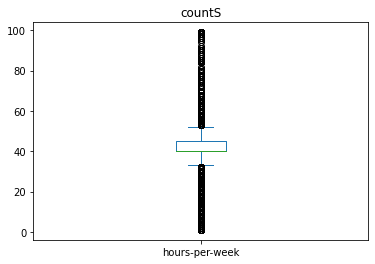

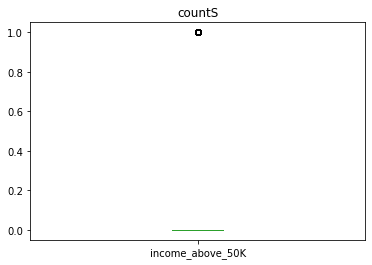

In [24]:
#Using box plots for numeric variables

for i in numerical:
    adult_data[i].plot(kind = 'box', title = 'countS')
    plt.show()
    if i == 'income-above-50K':
        continue

Looking at the boxplots, the outliers are natural because it is, for example, common to find people that work more hours than usual or people aged older than usual, so I am not going to drop or impute them. Instead, I will scale them appropriately later on


In [25]:
# For categorical features, I used dictionary comprehension to check if the various categories under each feature is out\n
## of the norm. For example,if for gender we have any category that's unusual.

x= {i:adult_data[i].value_counts() for i in categorical}
x


{'workclass': Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
 Name: workclass, dtype: int64,
 'education': HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
 Name: education, dtype: int64,
 'marital-status': Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
 Name: marital-status, dtype: int64,
 'occupation': Prof-specialty       5983
 Craft

From the above, no category looks like an anomaly for each of the features, implying that they are no outliers.

## Feature engineering and model building

In [73]:
#First, splitting the train data into dependent(y) and independent variables(X) 

X = adult_data.drop('income_above_50K',axis = 1)
y = adult_data['income_above_50K']

X_testdata =  adulttest_data.drop('income_above_50K',axis = 1)
y_testdata = adulttest_data['income_above_50K']


In [74]:
# Using pandas get_dummies function to onehotencode categorical features and avoid multicolinearity

X = pd.get_dummies(X, prefix_sep='_', drop_first=True)
X.head()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,native-country,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,39,77516,13,2174,0,40,1.0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,50,83311,13,0,0,13,1.0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,38,215646,9,0,0,40,1.0,0,0,1,...,1,0,0,0,0,0,0,0,1,1
3,53,234721,7,0,0,40,1.0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,28,338409,13,0,0,40,0.0,0,0,1,...,0,0,0,0,1,0,1,0,0,0


In [75]:
# Doing the same for the test data
X_testdata = pd.get_dummies(X_testdata, prefix_sep='_', drop_first=True)
X_testdata.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,native-country,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,25,226802,7,0,0,40,1.0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
1,38,89814,9,0,0,50,1.0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,28,336951,12,0,0,40,1.0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,44,160323,10,7688,0,40,1.0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,18,103497,10,0,0,30,1.0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [29]:
#Splitting X and y of the train data into training  and validation sets and setting 'stratify' to yes to ensure equal\n
#distribution of classes between the splits.

from sklearn.model_selection import train_test_split
X_train, X_validate, Y_train, Y_validate = train_test_split(X,y,stratify = y)


In [30]:
X_train.shape

(24420, 58)

Will be using a pipeline to build my models as it's way more neater and helps avoid doing repetetive tasks. It also prevents data leakage.

In [31]:
# powertransforming skewed variables and scaling normal variables
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

# Building numeric processor
#to_log = ['age','fnlwgt','education-num','capital-gain','capital-loss']
to_scale = ['hours-per-week','age','fnlwgt','education-num','capital-gain','capital-loss']
#numeric_pipe_1 = make_pipeline(PowerTransformer())
numeric_pipe_2 = make_pipeline(StandardScaler())

# numeric processor
numeric = ColumnTransformer(
    transformers=[("standardization", numeric_pipe_2, to_scale)]
    ,remainder = "passthrough")




I tried using powertransformer on my skewed variables but it turns out it wasn't the best way as metric scores for all the models went down,  so I resorted to using only the standard scaler.

In [32]:
#Defining a metric scores function for precission, recall, F1, and confusion matrix to be used to get the scores from the models
from sklearn.metrics import  (classification_report, ConfusionMatrixDisplay, confusion_matrix,auc,roc_auc_score,
roc_curve)


def metric_scores(model_pipeline):
 y_preds = model_pipeline.predict(X_validate)

 print(classification_report(Y_validate, y_preds))
 
 # Plotting the confusion matrix
 fig, ax = plt.subplots(figsize=(12, 8))
 cm = confusion_matrix(Y_validate, y_preds)
 cmp = ConfusionMatrixDisplay(cm, display_labels=model_pipeline.classes_)
 cmp.plot(ax=ax)
 plt.show()
 print('Train score: %.2f'%model_pipeline.score(X_train, Y_train))
 print('Test score: %.2f'%model_pipeline.score(X_validate, Y_validate))

In [33]:
# function to use to plot ROC curve and get aucroc score for applicable models
def AUCROC_curve(model_pipeline):
    
    probs = model_pipeline.predict_proba(X_validate)
    preds = probs[:,1]
    print("roc_auc_score: %.2f "%roc_auc_score(Y_validate, preds))
    fpr, tpr, threshold = roc_curve(Y_validate, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


## Logistic Regression 

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6181
           1       0.74      0.59      0.66      1960

    accuracy                           0.85      8141
   macro avg       0.81      0.76      0.78      8141
weighted avg       0.84      0.85      0.85      8141



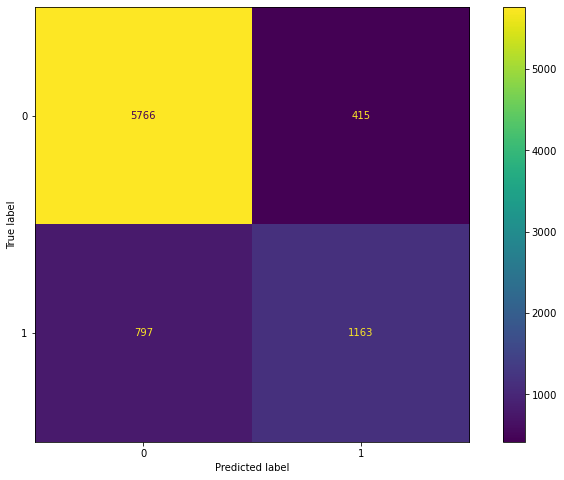

Train score: 0.85
Test score: 0.85
roc_auc_score: 0.90 


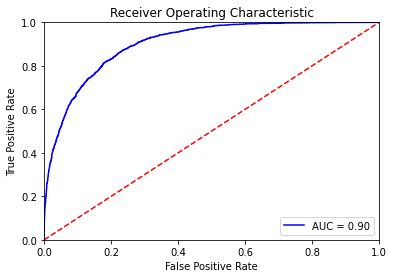

In [34]:
from sklearn.linear_model import LogisticRegression
logr= LogisticRegression(max_iter = 300)

logr_pipeline= Pipeline(steps=[("preprocess", numeric),( "model", logr)])

_ = logr_pipeline.fit(X_train, Y_train)



metric_scores(logr_pipeline)
AUCROC_curve(logr_pipeline)

## Bernoulli Naive Bayes

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      6181
           1       0.59      0.72      0.65      1960

    accuracy                           0.81      8141
   macro avg       0.75      0.78      0.76      8141
weighted avg       0.83      0.81      0.82      8141



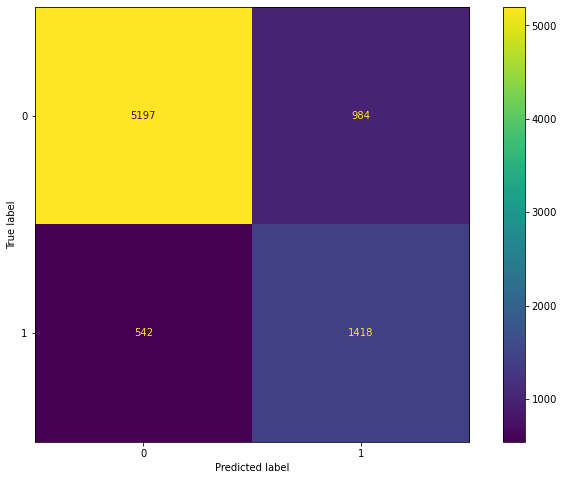

Train score: 0.81
Test score: 0.81


In [35]:
from sklearn.naive_bayes import BernoulliNB
nbB = BernoulliNB()


nbB_pipeline= Pipeline(steps=[("preprocess", numeric),( "model", nbB)])

_ = nbB_pipeline.fit(X_train, Y_train)



metric_scores(nbB_pipeline)



## SVM 

### SVM - Linear

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      6181
           1       0.74      0.57      0.64      1960

    accuracy                           0.85      8141
   macro avg       0.81      0.75      0.77      8141
weighted avg       0.84      0.85      0.84      8141



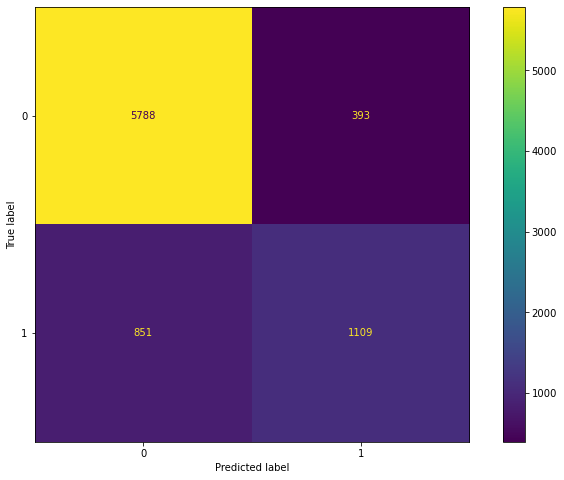

Train score: 0.85
Test score: 0.85
roc_auc_score: 0.90 


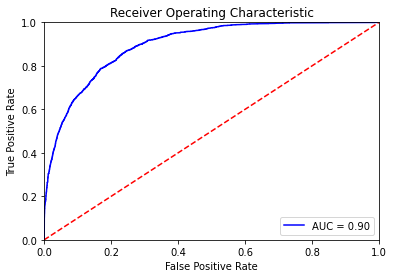

In [36]:
from sklearn.svm import SVC
svm_linear = SVC(kernel = "linear", probability = True)
svmL_pipeline= Pipeline(steps=[("preprocess", numeric),( "model", svm_linear)])

_ = svmL_pipeline.fit(X_train, Y_train)



metric_scores(svmL_pipeline)

AUCROC_curve(svmL_pipeline)


### SVM - RBF

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6181
           1       0.75      0.58      0.65      1960

    accuracy                           0.85      8141
   macro avg       0.81      0.76      0.78      8141
weighted avg       0.85      0.85      0.85      8141



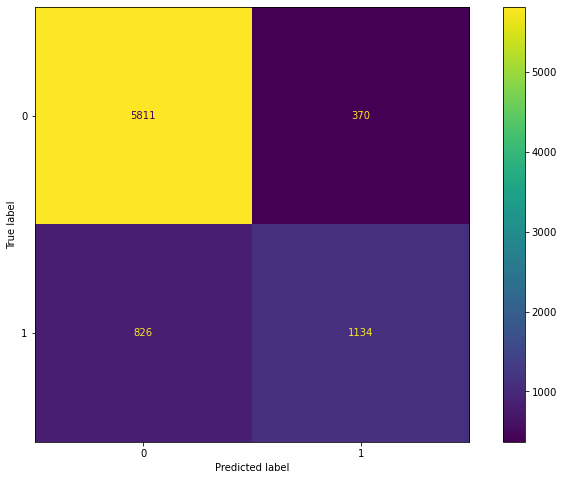

Train score: 0.87
Test score: 0.85
roc_auc_score: 0.90 


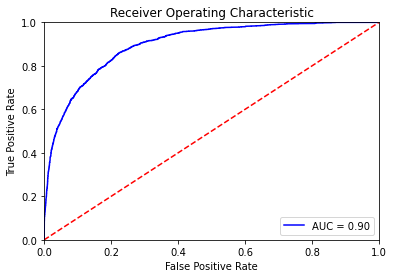

In [37]:
from sklearn.svm import SVC
svm_rbf = SVC(kernel = "rbf", probability = True)
svmRBF_pipeline= Pipeline(steps=[("preprocess", numeric),( "model", svm_rbf)])

_ = svmRBF_pipeline.fit(X_train, Y_train)



metric_scores(svmRBF_pipeline)

AUCROC_curve(svmRBF_pipeline)


## Decision Tree 

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6181
           1       0.75      0.51      0.61      1960

    accuracy                           0.84      8141
   macro avg       0.81      0.73      0.76      8141
weighted avg       0.83      0.84      0.83      8141



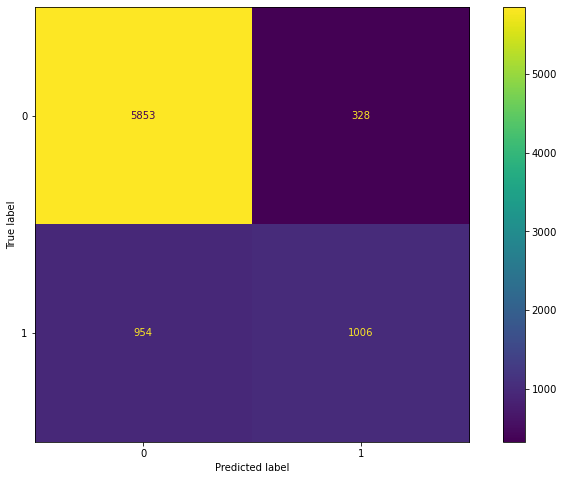

Train score: 0.84
Test score: 0.84
roc_auc_score: 0.87 


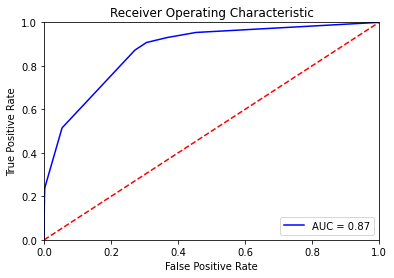

In [38]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(max_depth = 4,min_samples_split = 2,min_samples_leaf = 1)
dct_pipeline= Pipeline(steps=[("preprocess", numeric),( "model", dct)])

_ = dct_pipeline.fit(X_train, Y_train)



metric_scores(dct_pipeline)
AUCROC_curve(dct_pipeline)




              precision    recall  f1-score   support

           0       0.87      0.94      0.90      6181
           1       0.75      0.55      0.63      1960

    accuracy                           0.85      8141
   macro avg       0.81      0.74      0.77      8141
weighted avg       0.84      0.85      0.84      8141



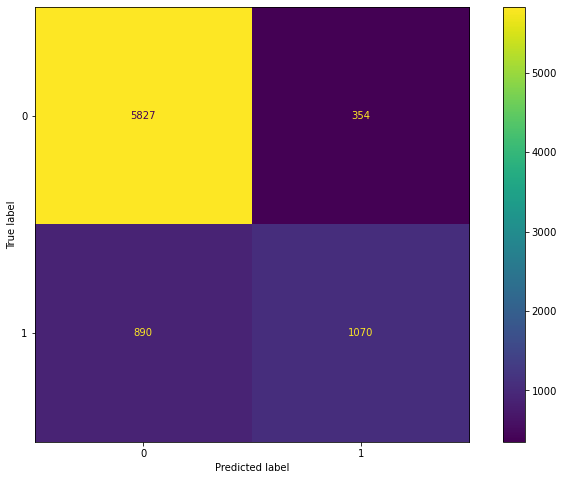

Train score: 0.85
Test score: 0.85
roc_auc_score: 0.90 


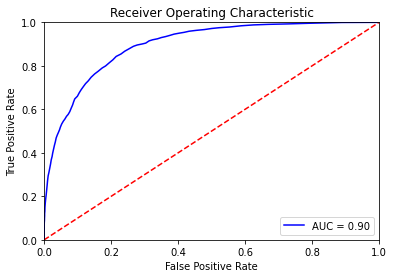

In [39]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
dct_2 = DecisionTreeClassifier(random_state=0)
dct_bag= BaggingClassifier(dct_2, n_estimators=100, max_samples=100, bootstrap=True, random_state=0)

dctbag_pipeline= Pipeline(steps=[("preprocess", numeric),( "model", dct_bag)])

_ = dctbag_pipeline.fit(X_train, Y_train)



metric_scores(dctbag_pipeline)

AUCROC_curve(dctbag_pipeline)


### Decision tree with Gradient Boosting 

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      6181
           1       0.79      0.62      0.69      1960

    accuracy                           0.87      8141
   macro avg       0.84      0.78      0.80      8141
weighted avg       0.86      0.87      0.86      8141



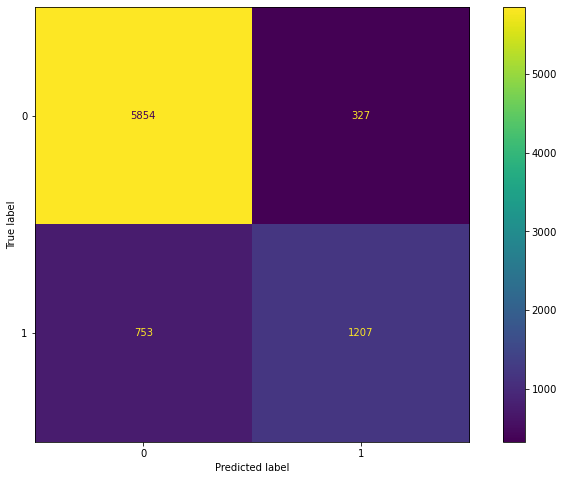

Train score: 0.87
Test score: 0.87
roc_auc_score: 0.92 


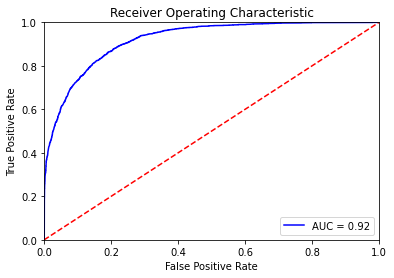

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
GB_dct = GradientBoostingClassifier(n_estimators=30, learning_rate=0.5, random_state=0)

GBdct_pipeline= Pipeline(steps=[("preprocess", numeric),( "model", GB_dct)])

_ = GBdct_pipeline.fit(X_train, Y_train)



metric_scores(GBdct_pipeline)

AUCROC_curve(GBdct_pipeline)


### Decision tree with AdaBoosting

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6181
           1       0.76      0.64      0.69      1960

    accuracy                           0.87      8141
   macro avg       0.83      0.79      0.80      8141
weighted avg       0.86      0.87      0.86      8141



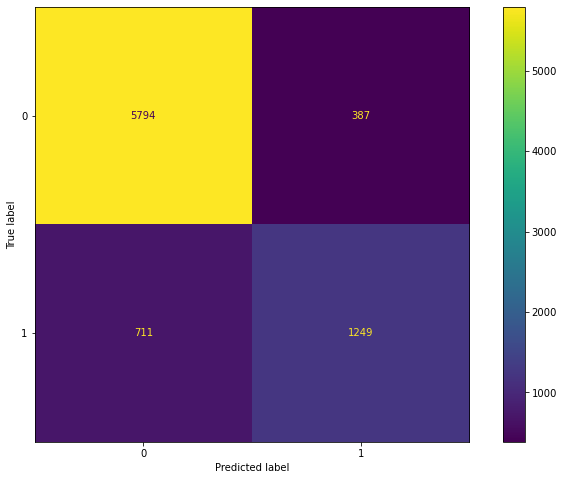

Train score: 0.89
Test score: 0.87
roc_auc_score: 0.91 


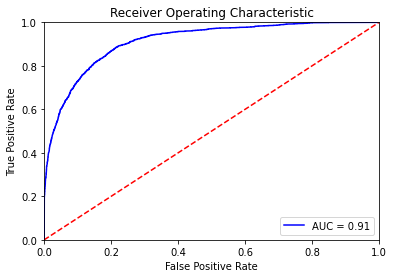

In [84]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adaB_dct = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), n_estimators=50, 
                             algorithm="SAMME.R", learning_rate=0.5, random_state=0)

adaB_dct_pipeline= Pipeline(steps=[("preprocess", numeric),( "model", adaB_dct)])

_ = adaB_dct_pipeline.fit(X_train, Y_train)



metric_scores(adaB_dct_pipeline)



AUCROC_curve(adaB_dct_pipeline)

## Random Forest

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6181
           1       0.73      0.62      0.67      1960

    accuracy                           0.85      8141
   macro avg       0.81      0.77      0.79      8141
weighted avg       0.85      0.85      0.85      8141



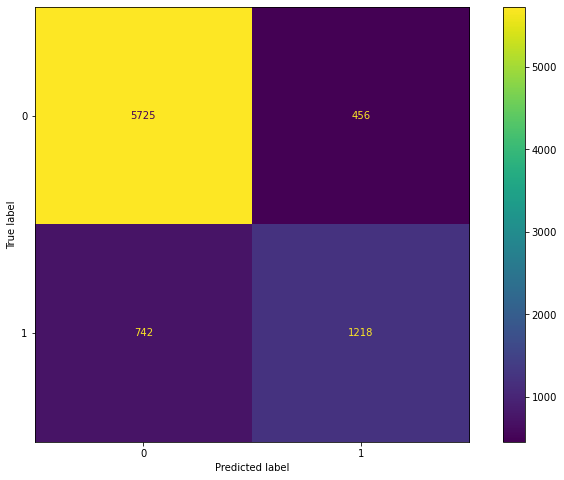

Train score: 1.00
Test score: 0.85
roc_auc_score: 0.90 


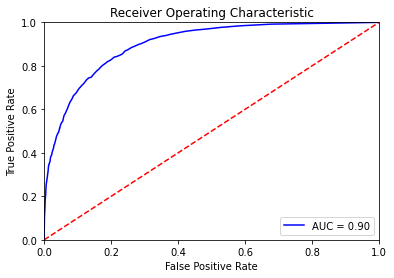

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf_pipeline= Pipeline(steps=[("preprocess", numeric),( "model", rf)])

_ = rf_pipeline.fit(X_train, Y_train)



metric_scores(rf_pipeline)
AUCROC_curve(rf_pipeline)


### Random Forest with AdaBoosting

With a train score of 1 and a test score of 0.85, the random forest is clearly overfitting. I'll reduce the overfitting by using an AdaBoosting classifier on it.

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6181
           1       0.77      0.62      0.68      1960

    accuracy                           0.86      8141
   macro avg       0.83      0.78      0.80      8141
weighted avg       0.86      0.86      0.86      8141



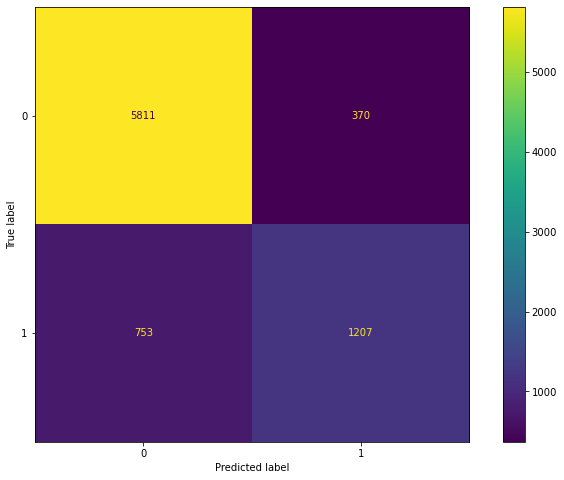

Train score: 0.87
Test score: 0.86
roc_auc_score: 0.92 


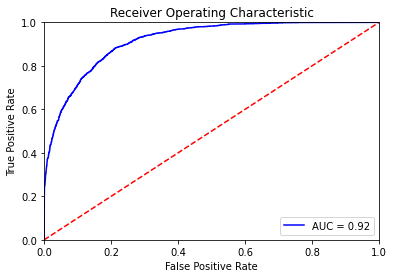

In [43]:
rf_ada = AdaBoostClassifier(RandomForestClassifier(max_depth=2), n_estimators=100, 
                             algorithm="SAMME.R", learning_rate=0.5, random_state=0)


rfada_pipeline= Pipeline(steps=[("preprocess", numeric),( "model", rf_ada)])

_ = rfada_pipeline.fit(X_train, Y_train)



metric_scores(rfada_pipeline)

AUCROC_curve(rfada_pipeline)


## KNN

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      6181
           1       0.65      0.59      0.62      1960

    accuracy                           0.82      8141
   macro avg       0.76      0.75      0.75      8141
weighted avg       0.82      0.82      0.82      8141



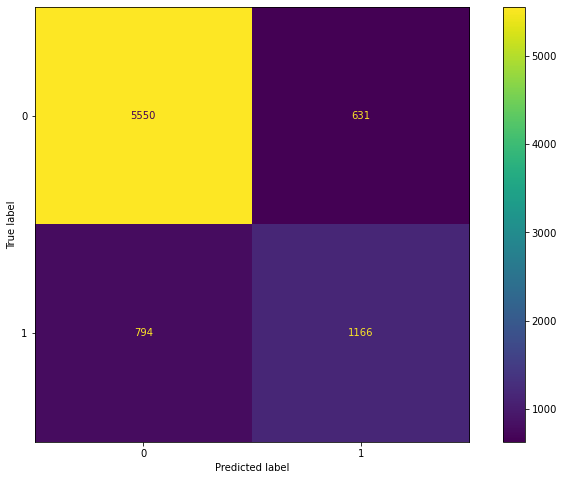

Train score: 0.90
Test score: 0.82
roc_auc_score: 0.83 


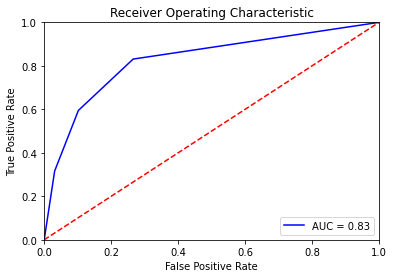

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

knn_pipeline= Pipeline(steps=[("preprocess", numeric),( "model", knn)])

_ = knn_pipeline.fit(X_train, Y_train)



metric_scores(knn_pipeline)
AUCROC_curve(knn_pipeline)




### KNN with Bagging

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      6181
           1       0.72      0.50      0.59      1960

    accuracy                           0.83      8141
   macro avg       0.79      0.72      0.74      8141
weighted avg       0.82      0.83      0.82      8141



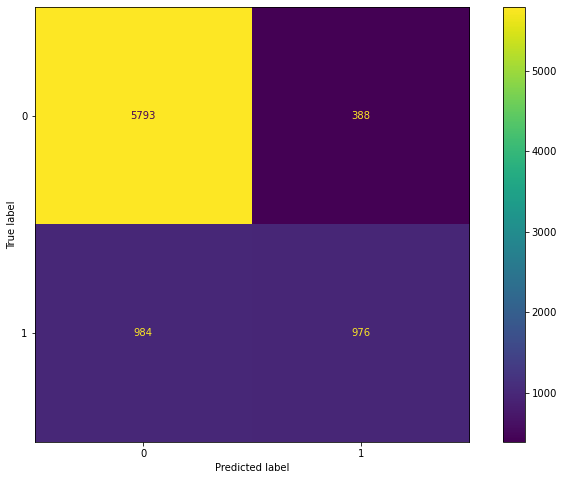

Train score: 0.84
Test score: 0.83
roc_auc_score: 0.89 


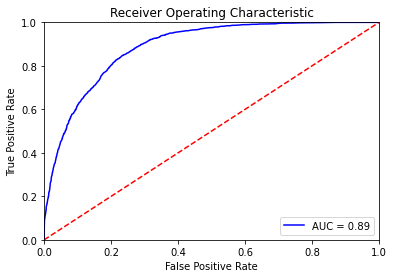

In [45]:
from sklearn.ensemble import BaggingClassifier
knn_2= KNeighborsClassifier(n_neighbors=3)
knn_bag = BaggingClassifier(knn_2, n_estimators=100, max_samples=100, bootstrap=True, random_state=0, oob_score = True)

knnbag_pipeline= Pipeline(steps=[("preprocess", numeric),( "model", knn_bag)])

_ = knnbag_pipeline.fit(X_train, Y_train)



metric_scores(knnbag_pipeline)

AUCROC_curve(knnbag_pipeline)



Observing that bagging helped to reduce overfitting for KNN as the difference between the train and test scores reduced significantly when combined with a bagging classifier.

## PCA

In [46]:
from sklearn.decomposition import PCA

pca=PCA()
pca_fit = pca.fit_transform(X_train)
pca.explained_variance_ratio_*100


array([9.95193896e+01, 4.79134448e-01, 1.47279426e-03, 1.67723429e-06,
       1.35799948e-06, 5.86112818e-08, 3.95748333e-09, 2.38259599e-09,
       2.06607048e-09, 1.95467835e-09, 1.64970393e-09, 1.57437450e-09,
       1.52254169e-09, 1.35338307e-09, 1.04595301e-09, 1.02744503e-09,
       8.92414169e-10, 8.41345099e-10, 7.78871422e-10, 7.40076803e-10,
       6.47588142e-10, 5.98698996e-10, 5.74570785e-10, 4.87326811e-10,
       4.44904400e-10, 4.06020973e-10, 3.90598903e-10, 3.36525234e-10,
       3.14116984e-10, 3.04394008e-10, 3.00186689e-10, 2.92915676e-10,
       2.76203229e-10, 2.63072263e-10, 2.49497037e-10, 2.37520439e-10,
       1.81828695e-10, 1.80069916e-10, 1.74590101e-10, 1.56981599e-10,
       1.32893529e-10, 1.25888088e-10, 1.02758824e-10, 9.88114666e-11,
       9.39058436e-11, 7.37442319e-11, 5.87706273e-11, 4.72019019e-11,
       3.72324907e-11, 2.68034926e-11, 1.83746819e-11, 1.47826748e-11,
       1.32897524e-11, 5.80930773e-12, 4.00089739e-12, 3.27827268e-12,
      

my PCA results seem to suggest that only one component is significant in determining predictions from the model. This is quite surprising as we have a total of 58 features after one hot encoding the categorical variables. Nevertheless, I am going to try out a couple of models with pca fitted data and see what I get. 

In [47]:
pca=PCA(n_components = 29)
X_train_PCA = pca.fit_transform(X_train)
X_validate_PCA = pca.transform(X_validate)


### Logistic Regression with PCA

In [48]:
from sklearn.linear_model import LogisticRegression
logr_pca= LogisticRegression(max_iter = 300)

logr_pca.fit(X_train_PCA,Y_train)
logrpca_pred = logr_pca.predict(X_validate_PCA)
print(classification_report(Y_validate, logrpca_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      6181
           1       0.58      0.35      0.44      1960

    accuracy                           0.78      8141
   macro avg       0.70      0.63      0.65      8141
weighted avg       0.76      0.78      0.76      8141



### AdaBoosted Random Forest with PCA

In [49]:
rf_ada_pca = AdaBoostClassifier(RandomForestClassifier(max_depth=2), n_estimators=100, 
                             algorithm="SAMME.R", learning_rate=0.5, random_state=0)

rf_ada_pca.fit(X_train_PCA,Y_train)
rfadapca_pred = rf_ada_pca.predict(X_validate_PCA)
print(classification_report(Y_validate, rfadapca_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6181
           1       0.76      0.60      0.67      1960

    accuracy                           0.86      8141
   macro avg       0.82      0.77      0.79      8141
weighted avg       0.85      0.86      0.85      8141



Model results from PCA fitted data give slightly lower scores on all the considered metrics for the two tried out models, so depending on the resources one has at their disposal, they can choose to base their models on PCA fitted data or not. 

## Model selection and Hyperparameter  tuning

Most of my tried out models have accuracy scores in the range of 84-87, so it's hard to choose one over the other. However, considering the nature of the data and all the scores: precission, recall, f1, and roc_auc, AdaBoosted Decision Tree Classifier takes the lead, so I am going to perform hyperparameter tuning for it and use the results to perform predictions on the untouched test data.

## AdaBoosted Decision Tree Hyperparameter tuning 

In [77]:
#rfada_pipeline.get_params().keys()
from sklearn.model_selection import RandomizedSearchCV

dct_ada2 = AdaBoostClassifier(DecisionTreeClassifier(),random_state=0,algorithm="SAMME.R")


dctada2_pipeline = Pipeline(steps=[("preprocess", numeric),( "model", dct_ada2)])

max_features = ["sqrt", "log2"]
max_depth = np.arange(1, 5)
min_samples_split = np.arange(1,5)
min_samples_leaf = [1, 2, 4]
n_estimators2 = np.arange(100, 500, step=100)
learning_rate = np.arange(0.5, 2, step=0.25)

param_grid = {
    'model__base_estimator__max_features': max_features,
    'model__base_estimator__max_depth': max_depth,
    'model__base_estimator__min_samples_split': min_samples_split,
    'model__base_estimator__min_samples_leaf': min_samples_leaf,
    "model__n_estimators": n_estimators2,
    "model__learning_rate": learning_rate
}
dctadarandom_cv = RandomizedSearchCV(dctada2_pipeline ,param_grid, n_iter=100, cv=3, scoring='f1_weighted', n_jobs=-1)
dctadarandom_cv.fit(X_train, Y_train)
dctadarandom_cv.best_params_




C:\ProgramData\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.86167071 0.85537334 0.8275758  0.84859939 0.84160579 0.85414818
 0.83390355 0.83893821 0.84987611        nan 0.86209175 0.86630219
 0.8619258  0.85860319 0.85866715        nan        nan 0.85321342
 0.85664717        nan 0.8632173  0.85080791        nan        nan
        nan 0.84571397 0.86308712 0.83684109 0.85495471 0.86474057
 0.86346073 0.85629041 0.84703909 0.86459836 0.86225211        nan
 0.86042747 0.83646212 0.86176811        nan 0.85339282 0.84208377
 0.85545679        nan 0.85564925 0.86414889 0.85808446 0.86013625
 0.85493901 0.85321342 0.86177748 0.83849972        nan 0.86225211
 0.86261673 0.83668691 0.8591125  0.85601471 0.85901086 0.85846052
 0.85733665 0.83849972        nan 0.85998502 0.84737288        nan
 0.85810568 0.83282711 0.84571397        nan 0.85895094 0.85901086
 0.86252594 0.85629041        nan 0.85058827 0.8400122

{'model__n_estimators': 300,
 'model__learning_rate': 0.5,
 'model__base_estimator__min_samples_split': 4,
 'model__base_estimator__min_samples_leaf': 4,
 'model__base_estimator__max_features': 'sqrt',
 'model__base_estimator__max_depth': 2}

## Testing the above validated and hyperparameter tuned Model on the untouched test data

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     12435
           1       0.76      0.65      0.70      3846

    accuracy                           0.87     16281
   macro avg       0.83      0.79      0.81     16281
weighted avg       0.87      0.87      0.87     16281



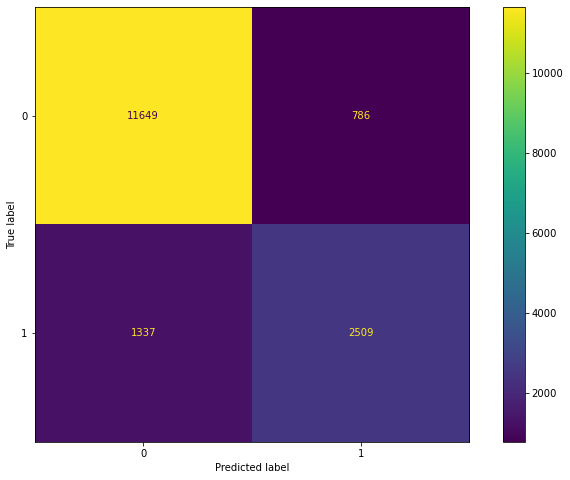

Train score: 0.88
Test score: 0.87
roc_auc_score: 0.92 


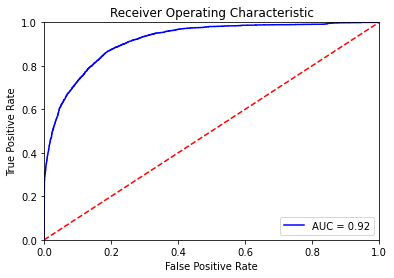

In [79]:
dct_ada3 = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2, min_samples_split = 4, min_samples_leaf = 4,
            max_features = "sqrt"),n_estimators =300,learning_rate = 0.5,random_state=0,algorithm="SAMME.R")


dctada3_pipeline = Pipeline(steps=[("preprocess", numeric),( "model", dct_ada3)])

#Reusing the scores and curves functions but changing the validation data set used for the preceding models to test data set used here

def metric_scores_testdata(model_pipeline):
 y_preds = model_pipeline.predict(X_testdata)

 print(classification_report(y_testdata, y_preds))
 
 # Plotting the confusion matrix
 fig, ax = plt.subplots(figsize=(12, 8))
 cm = confusion_matrix(y_testdata, y_preds)
 cmp = ConfusionMatrixDisplay(cm, display_labels=model_pipeline.classes_)
 cmp.plot(ax=ax)
 plt.show()
 print('Train score: %.2f'%model_pipeline.score(X_train, Y_train))
 print('Test score: %.2f'%model_pipeline.score(X_testdata, y_testdata))

# function to use to plot ROC curve and get aucroc score for applicable models
def AUCROC_curve_testdata(model_pipeline):
    
    probs = model_pipeline.predict_proba(X_testdata)
    preds = probs[:,1]
    print("roc_auc_score: %.2f "%roc_auc_score(y_testdata, preds))
    fpr, tpr, threshold = roc_curve(y_testdata, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


_ =dctada3_pipeline.fit(X_train, Y_train)



metric_scores_testdata(dctada3_pipeline)
AUCROC_curve_testdata(dctada3_pipeline)




The chosen model did quite well on the previously unseen data, giving an accuracy of 87%, a weighted f1 score of 87%, and a roc_auc_score of 92%! And this brings me to a wonderful end of this project for now. 